In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.Owner.unique()

array([0, 1, 3])

In [7]:
df["Owner"] = df["Owner"].replace([0,1,3],["NoOwner", "FirstOwner", "ThirdOwner"])

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,NoOwner
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,NoOwner
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,NoOwner
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,NoOwner
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,NoOwner


In [9]:
categorical_features = [feature for feature in df if df[feature].dtype == 'object' and len(df[feature].unique()) < 25]

In [10]:
categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [11]:
for feature in categorical_features:
    print(feature,'\n', df[feature].unique())

Fuel_Type 
 ['Petrol' 'Diesel' 'CNG']
Seller_Type 
 ['Dealer' 'Individual']
Transmission 
 ['Manual' 'Automatic']
Owner 
 ['NoOwner' 'FirstOwner' 'ThirdOwner']


In [12]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


In [14]:
df["Owner"] = df["Owner"].replace(["NoOwner", "FirstOwner", "ThirdOwner"], [0,1,3])

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [17]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Now to find the age of the car

In [18]:
current_year = 2022

In [19]:
final_dataset["Age_of_car"] = current_year - pd.to_numeric(final_dataset["Year"])

In [20]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [21]:
final_dataset.drop(["Year"], axis = 1, inplace = True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [23]:
final_dataset["Fuel_Type"] = final_dataset["Fuel_Type"].replace(['Petrol', 'Diesel', 'CNG'],[1,2,3])

In [24]:
final_dataset["Seller_Type"] = final_dataset["Seller_Type"].replace(['Dealer' ,'Individual'],[1,2])

In [25]:
final_dataset["Transmission"] = final_dataset["Transmission"].replace(['Manual' ,'Automatic'],[1,2])

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,3.35,5.59,27000,1,1,1,0,8
1,4.75,9.54,43000,2,1,1,0,9
2,7.25,9.85,6900,1,1,1,0,5
3,2.85,4.15,5200,1,1,1,0,11
4,4.60,6.87,42450,2,1,1,0,8


In [27]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Age_of_car,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


In [28]:
import seaborn as sns

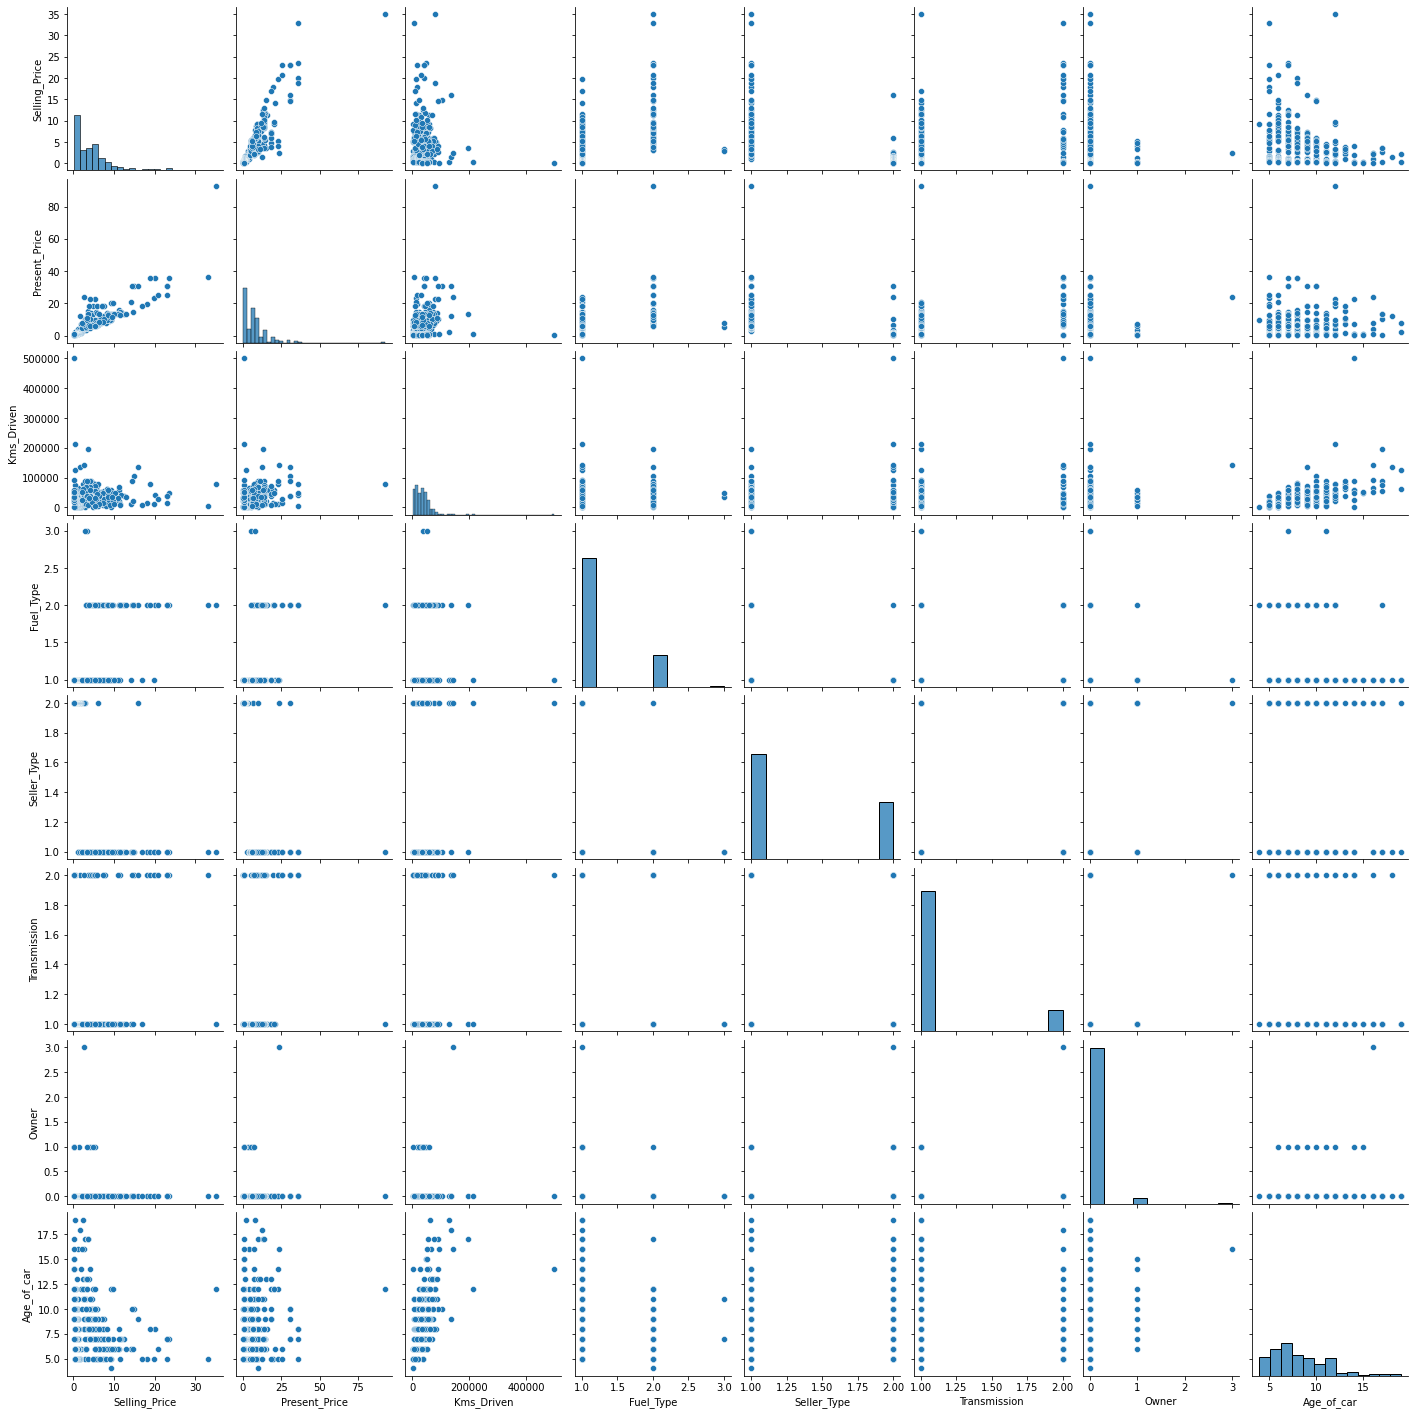

In [29]:
sns.pairplot(final_dataset)

In [30]:
corr_mat = final_dataset.corr()

In [31]:
corr_mat.index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age_of_car'],
      dtype='object')

In [32]:
top_corr_features = corr_mat.index

In [33]:
import matplotlib.pyplot as plt

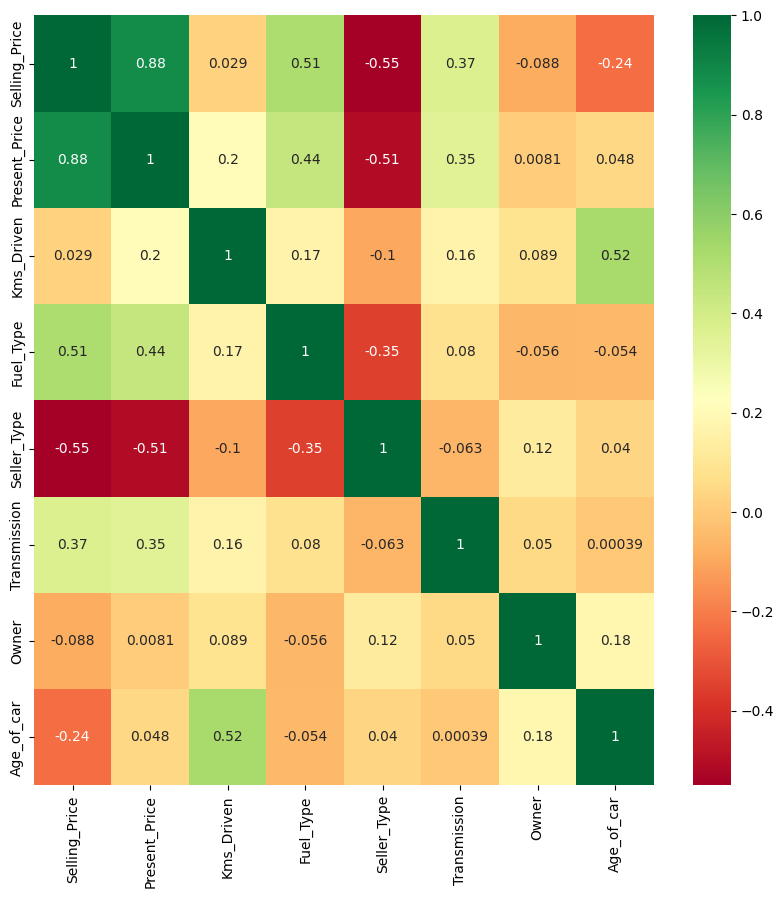

In [34]:
plt.figure(figsize=(10,10))
#plot heat map
h = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde818888b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde81888e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde8187d490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde81895430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde81895700>],
 'means': []}

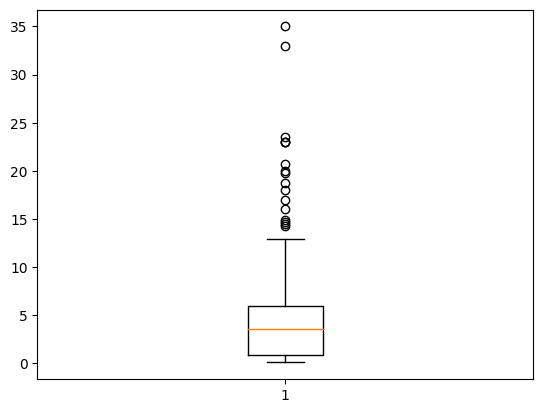

In [35]:
plt.boxplot(final_dataset["Selling_Price"])

In [36]:
final_dataset.groupby("Seller_Type")["Selling_Price"].median()

Seller_Type
1    5.250
2    0.515
Name: Selling_Price, dtype: float64

In [37]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,3.35,5.59,27000,1,1,1,0,8
1,4.75,9.54,43000,2,1,1,0,9
2,7.25,9.85,6900,1,1,1,0,5
3,2.85,4.15,5200,1,1,1,0,11
4,4.60,6.87,42450,2,1,1,0,8


In [38]:
#independent and dependent features
x = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:,0]

In [39]:
x.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,5.59,27000,1,1,1,0,8
1,9.54,43000,2,1,1,0,9
2,9.85,6900,1,1,1,0,5
3,4.15,5200,1,1,1,0,11
4,6.87,42450,2,1,1,0,8


In [40]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [41]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor

In [42]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [43]:
print(model.feature_importances_)

[0.43497682 0.03840731 0.13002825 0.2421015  0.07412601 0.0007201
 0.07964001]


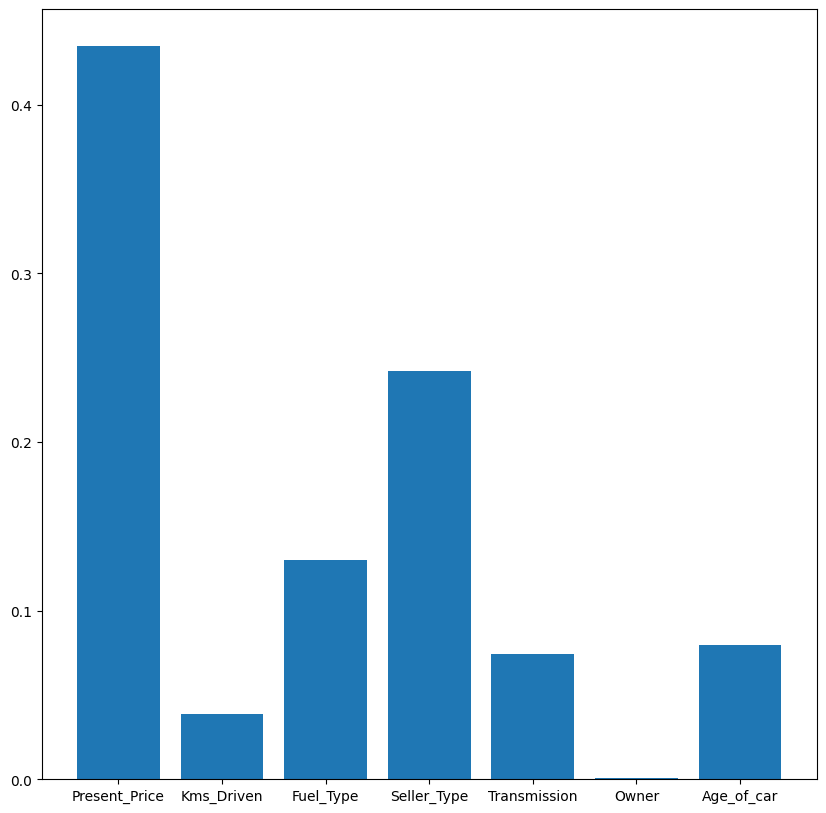

In [44]:
#Plot feature importance
feature_importance = pd.Series( model.feature_importances_, index = x.columns)
plt.figure(figsize =(10,10))
plt.bar(x.columns, feature_importance)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)

In [46]:
x_train

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
258,13.60,25000,1,1,1,0,7
249,7.60,17000,1,1,1,0,6
238,9.40,60241,1,1,1,0,9
79,30.61,89000,2,1,2,0,10
35,7.74,49998,3,1,1,0,11
...,...,...,...,...,...,...,...
231,9.40,15001,1,1,1,0,5
13,7.71,26000,1,1,1,0,7
171,0.55,6700,1,2,1,0,7
86,92.60,78000,2,1,1,0,12


In [47]:
from sklearn.ensemble import RandomForestRegressor


In [48]:
import numpy as np

In [49]:
#Hypeparameters
#number of trees in random forest
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [50]:
#Number of features to consider in every split
max_features = ["auto", "sqrt"]
#max no of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30 , num = 6)]
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10 , 15 ,100]
#minimum number of samples required at each node
min_leaf_samples = [1,2,5,10]


In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
random_grid = {"n_estimators" : n_estimators, "max_features": max_features, "max_depth" : max_depth, "min_samples_split" : min_samples_split, "min_samples_leaf" : min_leaf_samples}

In [53]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
rf = RandomForestRegressor()

In [55]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42,n_jobs = 1)

In [56]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.6s
[CV] END max_depth=5, max_feat

/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.5s


/Users/gp/Data Science/Python/Python Projects/venvs/cardhekovenv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.5s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
predictions = rf_random.predict(x_test)

In [59]:
predictions

array([ 9.10902,  0.22125,  6.67326,  0.47621,  0.52405,  5.51164,
        4.03291,  8.4579 ,  0.66881,  2.67312,  1.01091,  5.05887,
        0.87085,  0.71086,  5.32678,  5.551  ,  9.01399,  5.41738,
        5.9348 ,  3.6441 ,  9.03482,  4.84658,  0.30665,  1.3789 ,
        3.27557, 19.7491 ,  0.9784 ,  2.92679,  6.23733,  0.55167,
        1.03138, 10.20474,  2.38176,  0.92306,  5.70095,  5.34337,
        4.73983, 11.78657,  3.3156 ,  0.42619,  5.513  ,  0.6367 ,
        4.41146,  8.37762,  6.46841,  2.9304 ,  3.07227,  5.18126,
        0.77596,  0.99243,  6.05176,  4.41936,  6.97534,  6.7377 ,
        0.53944,  5.36215,  4.72065,  1.03813,  0.50046,  0.54196,
        9.76763])

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

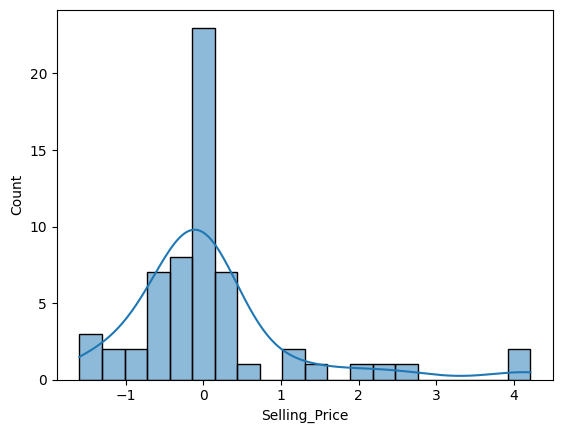

In [60]:
sns.histplot(y_test-predictions,kde = True)

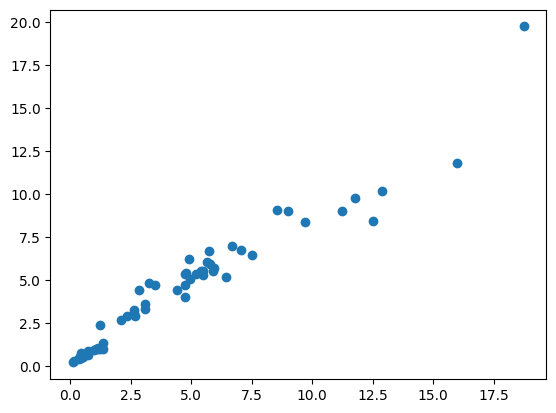

In [61]:
plt.scatter(y_test,predictions)

In [62]:
import pickle

In [63]:
#open a file to store the data
with open("random_forest_regression_model.pkl", "wb") as file:
    #dump the model data
    pickle.dump(rf_random, file)